### Prj05

Consider the Vasicek model
$$d r_t = \alpha (b - r_t) dt + \sigma dW_t$$
with the following parameters:
$$r_0 = .005, \alpha = 2.11, b = 0.02, \sigma = 0.033.$$

**Todo**

1. Implement Euler simulation and draw a plot of $\mathbb E[ r_t ]$ on $t\in [0, 10]$.
2. Find explicit form of $\mathbb E [r_t]$ and $\lim_{t\to \infty} \mathbb E [r_t]$.
3. Zero bond price has the formula
$$P(0, T) = \mathbb E[\exp\{-\int_0^T r(s) ds\}].$$
Find the exact value of $P(0,1)$.
4. 
Run Euler, Milstein, exact simulation on $P(0,1)$ with different stepsizes, and find the covergence rate for each using linear regression. (Hint: one shall approximate integral with finite sum)

### My answer:
######
(1)  Euler-Maruyma scheme
$$ r_{t+1}=r_t+\alpha(b-r_t) \delta +\sigma ({r_t})W_{t,t+\delta} $$
######
(2)   The explicit form of $\mathbb E[r_t]$ is:
$$ \mathbb E[r_t]=e^{-\alpha t}[r_0+b(e^{\alpha t}-1)] $$
$$ lim_{t \rightarrow \infty} \mathbb E[r_t] = b $$
######
(3)   The exact value of $P(0,1)$ is 0.986
######
(4)    The covergence rate for each using linear regression.

The rate for Euler is -0.03754

The rate for Milstein is 0.01086

The rate for Exact is 0.36297

#### Answer for (1)

###### Vasicek model
$$ dr_t=\alpha(b-r_t)dt+\sigma dW_t $$
###### EM scheme
$$ r_{t+1}=r_t+\alpha(b-r_t) \delta +\sigma ({r_t})W_{t,t+\delta} $$

In [13]:
import numpy as np
import matplotlib.pyplot as plt

def SDE(Mu,Sigma,r0,T0,T1,n):
    t=np.linspace(T0,T1,n+1)
    rh=r0+np.zeros(n+1)
    for i in range(n):
        rh[i+1] = rh[i] + Mu(rh[i],t[i])*(t[i+1]-t[i]) + Sigma(rh[i],t[i])*np.sqrt(t[i+1]-t[i])*np.random.normal()
    return rh,t

alpha = 2.11
b = 0.02

Mu = lambda r,t: alpha*(b-r)
Sigma=lambda r,t: sig

T0 = 0
T1 = 10
n  = 1000 #number of time step
W  = np.zeros(n+1)
t  = np.linspace(T0,T1,n+1)

r0 = 0.005
r  = r0 + np.zeros(n+1)
iteration = 1000 # number of iteration time
p = np.zeros(iteration)

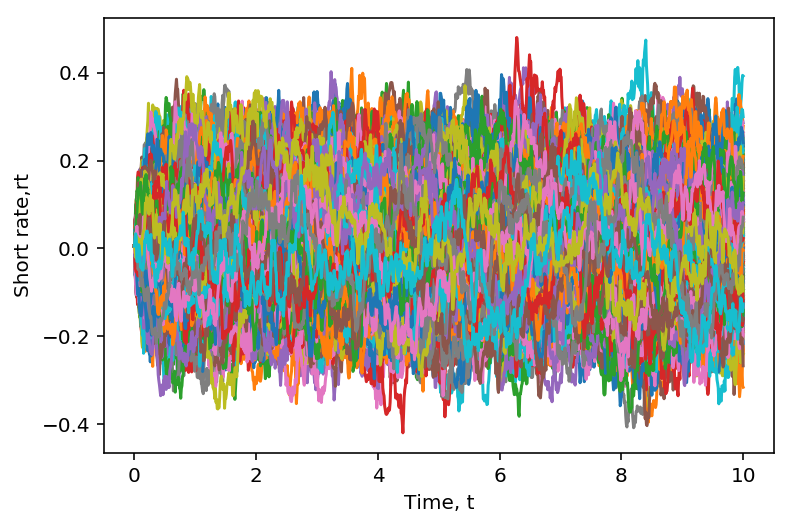

In [2]:
for i in range(iteration):
    [rh,t]=SDE(Mu,Sigma,r0,T0,T1,n)
    plt.plot(t,rh)
    #plt.ylim(0,200)
    plt.ylabel("Short rate,rt")
    plt.xlabel("Time, t")
    #p[i]=PutPay(r,T1-T0,K,xh[-1])
    p[i]=rh[-1]
    #sum=sum+xh[-1]

In [5]:
print('The mean short rate is', p.mean())

The mean short rate is 0.019667216726213223


#### Answer for (2)

Derivation of the explicit form
$$ dr_t=\alpha(b-r_t)dt+\sigma dW_t $$
Based on Ito's fornmula, the following solution can be obtained:
$$r_t=e^{-\alpha t}[r_0+\int_0^t\alpha be^{\alpha u}du+\sigma \int_0^te^{\alpha u}dW_u] = \mu_t +\sigma \int_0^t e^{\alpha(u-t)}dW_u $$
The integration of the vasicek model is as follows:
$$ r_t= r_0+\int_0^t(\alpha(b-r_u)du+\sigma dW_u) $$
Comparing the above two equations, the following equation can be obtained:
$$   \mu_t=\mathbb E[r_t]=r_0+\int_0^t\alpha(b-\mathbb E[r_u])du $$
Solving the above linear ordinary differential equation (ODE), the expection of short rate is obtained as follows:
$$ \mathbb E[r_t]=e^{-\alpha t}[r_0+b(e^{\alpha t}-1)] $$
If the stochastic term is included, the explicit solution is as follows:
$$ r_t=e^{-\alpha t}[r_0+b(e^{\alpha t}-1)] + \sigma \int_0^t dW_t $$

Thus,
$$ lim_{t \rightarrow \infty} \mathbb E[r_t] = b $$

#### Answer for (3)

Zero bond price has the formula
$$P(0, T) = \mathbb E[\exp\{-\int_0^T r(s) ds\}].$$
In order to find the exact value of $P(0,1)$, we know that the exact value of P(0,1) is as follows:
$$ P(0,1) =A(0,1) e^{-B(0,1)r_0} $$
Where:
$$ B(0,1)=\frac{1}{\alpha}(1-e^{-a}) $$
$$ A(0,1)=exp[(b-\frac{\sigma^2}{2\alpha^2})(B(0,1)-1)-\frac{\sigma^2}{4\alpha}B^2(0,1)] $$

In [14]:
r0 = 0.005
alpha = 2.11
b = 0.02
sigma = 0.033

B = 1.0/alpha*(1-1.0/np.exp(alpha))
A = np.exp((b-sigma**2/2.0/alpha**2)*(B-1)-sigma**2/4.0/alpha*B**2)

P = A*np.exp(-1*B*r0)

print('A(0,1)=',A)
print('B(0,1)=',B)
print('The bond price P(0,1)=',P)

A(0,1)= 0.9884457529601326
B(0,1)= 0.4164748974249376
The bond price P(0,1)= 0.9863895803459704


#### Answer for (4)

##### EM scheme

$$ r_{t+1}=r_t+\alpha(b-r_t) \delta +\sigma ({r_t})W_{t,t+\delta} $$

##### Milstein scheme

$$ r_{t+1}=r_t+\alpha(b-r_t) \delta +\sigma ({r_t})W_{t,t+\delta} +\frac{1}{2}\sigma^{'}(r_t)\sigma (r_t)(W^2_{t,t+\delta}-\delta) = r_t+\alpha(b-r_t) \delta +\sigma ({r_t})W_{t,t+\delta} $$

From the volatility $\sigma$ is constant, we know that EM scheme coincides wih Milstein scheme

##### Exact simulation

$$ r_t=e^{-\alpha t}[r_0+b(e^{\alpha t}-1)] + \sigma \int_0^t dW_t $$



In [15]:
from scipy import stats

class SDE:
    
    """
    Initialize
    """
    def __init__(self, Mu, Sigma, InitState):
        self.Mu = Mu
        self.Sigma = Sigma
        self.InitState = InitState
        
        self.MuP = lambda x, t: 0 #first order derivative of Mu
                                #used for Milstein
        
    """
    Euler method
    """
    def Euler(self, T, N):
        x0 = self.InitState
        Mu = self.Mu
        Sigma = self.Sigma       
        t = np.linspace(0, T, N+1)
        DeltaT = T/N
        
        Wh = np.zeros(N+1) #init BM
        Xh = x0 + np.zeros(N+1) #init Xh
        
        for i in range(N): #run EM            
            DeltaW = np.sqrt(t[i+1] - t[i]) * np.random.normal()
            Wh[i+1] = Wh[i] + DeltaW
            Xh[i+1] = Xh[i] + \
                Mu(Xh[i], t[i]) * DeltaT + \
                Sigma(Xh[i], t[i])* DeltaW
            
        return t, Xh, Wh


    """
    Milstein method
    """
    
    def Milstein(self, T, N):
        x0 = self.InitState
        Mu = self.Mu
        MuP = self.MuP
        
        Sigma = self.Sigma
        t = np.linspace(0, T, N+1)
        DeltaT = T/N
        
        Wh = np.zeros(N+1) #init BM
        Xh = x0 + np.zeros(N+1) #init Xh
        
        for i in range(N):
            DeltaW = np.sqrt(t[i+1] - t[i]) * np.random.normal()
            Wh[i+1] = Wh[i] + DeltaW
            Xh[i+1] = Xh[i] + \
                Mu(Xh[i], t[i]) * DeltaT + \
                Sigma(Xh[i], t[i])* DeltaW #Euler
            Xh[i+1] = Xh[i+1] + \
                0.5 * Mu(Xh[i], t[i]) * MuP(Xh[i], t[i]) * (DeltaW**2 - DeltaT)
                
        return t, Xh, Wh
    
    """
    Exact simulation
    """
    def Exact(self,a,b,T,sigma,N):
        
        x0 = self.InitState      
        t = np.linspace(0, T, N+1)
        Xh = x0 + np.zeros(N+1)
        
        for i in range(N):
            Xh[i+1]=x0*np.exp(-1*a*t[i+1])+b-b*np.exp(-1*a*t[i+1])+sigma*np.random.normal()       
        return Xh

    """
    Explict solution
    """
    def Explicit(self,a,b, T, Wt):
        x0 = self.InitState
        xh=x0*np.exp(-1*a*T)+b-b*np.exp(-1*a*T)+Wt
        return xh
    
    def Bond_Exact(self,a,b,sigma):
        x0 = self.InitState
        B=1.0/a*(1-1.0/np.exp(a))
        A=np.exp((b-sigma**2/2.0/a**2)*(B-1)-sigma**2/4.0/a*B**2)
        P=A*np.exp(-1*B*x0)
        return P


rate for Euler is -0.0037542476113213547
rate for Milstein is 0.010862406839400773
rate for Exact is 0.36297043463942513


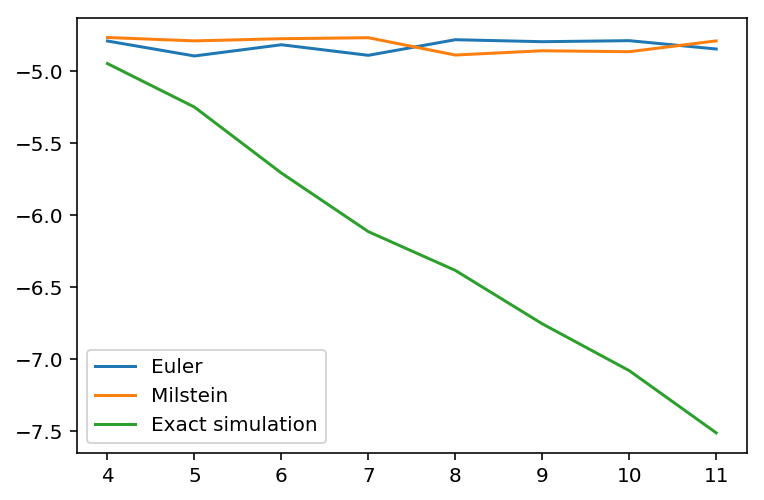

In [16]:
if __name__ == '__main__':

    #OU process
    alpha = 2.11
    b = 0.02
    mu = lambda x, t: alpha*(b-x)
    sigma = lambda x, t: 0.033
    sig = 0.033
    x0 = 0.005

    iSDE = SDE(mu, sigma, x0)

    ArrLog2Steps = np.arange(8)
    NumMinLog2Steps = 4

    ArrErr_Euler = np.zeros(ArrLog2Steps.size)
    ArrErr_Milstein = np.zeros(ArrLog2Steps.size)
    ArrErr_Exact = np.zeros(ArrLog2Steps.size)
    T = 1.
    NumSimu = 200

    '''
    Exact price of zero-coupon bond
    '''
    P=iSDE.Bond_Exact(alpha,b,sig)

    for n in ArrLog2Steps:
        NumMesh = np.power(2, n + NumMinLog2Steps)
        errsum_Euler = 0
        errsum_Milstein = 0
        errsum_Exact = 0

        deltaT=T/NumMesh

        for i in range(NumSimu):

            '''
            Euler simulation
            '''
            [t, Xh, Wh] = iSDE.Euler(T, NumMesh)
            XhT = Xh[-1]
            #XT = iSDE.Explicit(alpha,b,T,Wh[-1])
            PhT=np.exp(-1.0*deltaT*np.sum(Xh))
            errsum_Euler = errsum_Euler + np.abs(PhT - P)
            #plt.plot(t,Xh)
            '''
            Milstein simulation
            '''
            [t, Xh, Wh] = iSDE.Milstein(T, NumMesh)
            XhT = Xh[-1]
            #XT = iSDE.Explicit(alpha,b,T,Wh[-1])
            PhT=np.exp(-1.0*deltaT*np.sum(Xh))
            errsum_Milstein = errsum_Milstein + np.abs(PhT - P)
            '''
            Exact simulation
            '''

            Xh= iSDE.Exact(alpha,b,T,sig,NumMesh)
            #XhT = Xh[-1]
            #XT= iSDE.Explicit(alpha,b,T,Wh[-1])

            PhT=np.exp(-1.0*deltaT*np.sum(Xh))
            errsum_Exact = errsum_Exact + np.abs(PhT - P)

        ArrErr_Euler[n] = errsum_Euler/NumSimu
        ArrErr_Milstein[n] = errsum_Milstein/NumSimu
        ArrErr_Exact[n] = errsum_Exact/NumSimu

    x_coordinate = ArrLog2Steps+NumMinLog2Steps
    y_coordinate_Euler = np.log(ArrErr_Euler)
    y_coordinate_Milstein = np.log(ArrErr_Milstein)
    y_coordinate_Exact = np.log(ArrErr_Exact)
    plt.plot(x_coordinate, y_coordinate_Euler,label='Euler')
    plt.plot(x_coordinate, y_coordinate_Milstein,label='Milstein')
    plt.plot(x_coordinate, y_coordinate_Exact,label='Exact simulation')
    plt.legend()

    lg0 = stats.linregress(x_coordinate,y_coordinate_Euler)
    lg1 = stats.linregress(x_coordinate,y_coordinate_Milstein)
    lg2 = stats.linregress(x_coordinate,y_coordinate_Exact)
    rate0 = -lg0[0]
    rate1=-lg1[0]
    rate2=-lg2[0]
    print('rate for Euler is '+ str(rate0))
    print('rate for Milstein is '+ str(rate1))
    print('rate for Exact is '+ str(rate2))